# 🏡 Previsão de Preços de Casas com XGBoost

Este projeto tem como objetivo aplicar técnicas de regressão para prever o **preço de venda de imóveis residenciais** com base em características estruturais e demográficas das casas.

O modelo foi desenvolvido utilizando:
- Dados do [conjunto "House Prices - Advanced Regression Techniques"](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)
- Tratamento de dados e engenharia de atributos
- Algoritmo de regressão **XGBoost**
- Avaliação com métricas como **MAE**, **RMSE** e **R²**
- Interpretação de variáveis mais influentes

Além disso, o notebook inclui uma **simulação prática**, mostrando como o modelo pode ser utilizado para **precificar novos imóveis** com base em suas características.

🔍 O foco do projeto é demonstrar de forma didática como construir um modelo preditivo aplicável a problemas reais de negócio.

---

##Etapa 01 - Importando as bibliotecas e bases

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")


In [20]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###Entendendo os dados:


In [21]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###Verificando valores ausentes:



In [22]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


### Visualizar a distribuição do preço de venda:

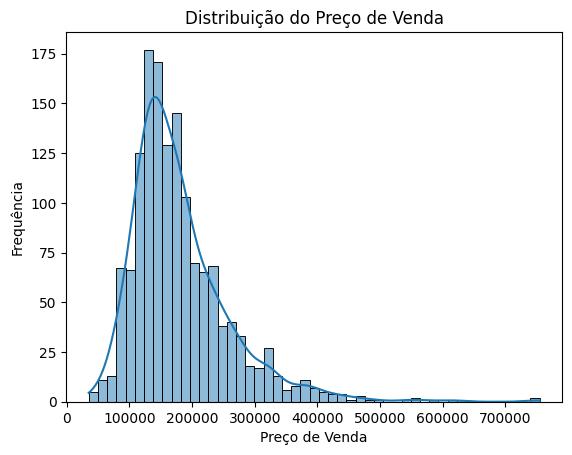

In [23]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribuição do Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()


#Etapa 02 - Pré-processamento de dados:

In [24]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())


####Remover colunas irrelevantes para o modelo:

In [25]:
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1)


####Codificar variáveis categoricas:

In [26]:
df = pd.get_dummies(df)


#### Separar variáveis independentes (x) e dependente (y)

In [27]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


#Etapa 03 - Divir dados de treino e teste:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Treinando o modelo (XGboost)

In [43]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Avaliar o desempenho do modelo:

In [30]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')


MAE: 16016.07
RMSE: 25248.61
R²: 0.92


### Avaliar a importância das variváveis:

<Figure size 1000x800 with 0 Axes>

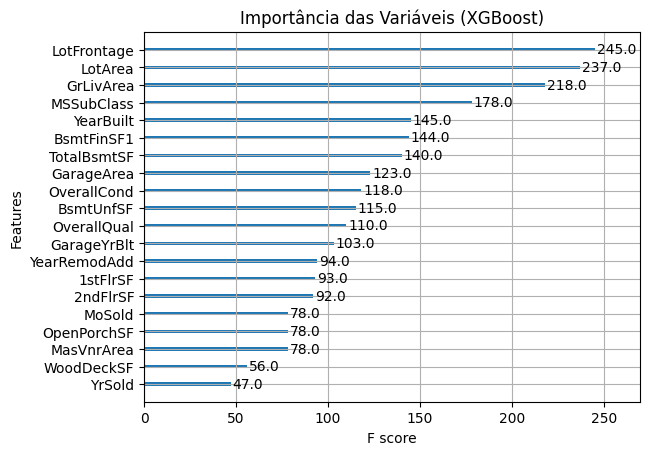

In [41]:
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20, importance_type='weight')
plt.title("Importância das Variáveis (XGBoost)")
plt.savefig('top_20_features.png')
plt.show()


#Etapa 04 - Comparar valores gerados com os reais da base:

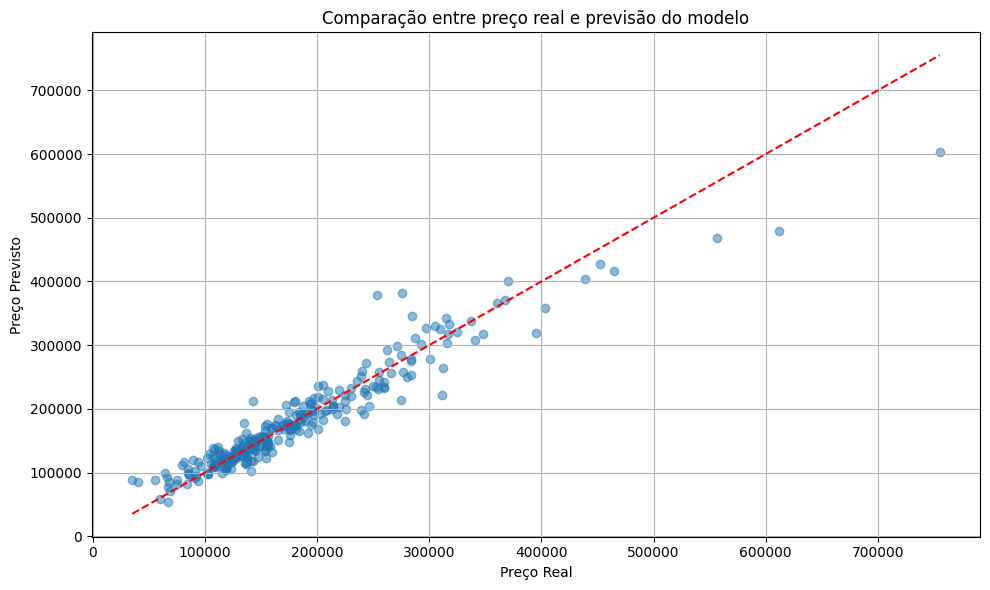

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Comparação entre preço real e previsão do modelo")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.savefig('real_vs_pred.png')
plt.show()


### Previsão de um valor com o modelo criado na prática:

In [34]:
# Criar uma linha com as mesmas colunas que o X_train
nova_casa = X_train.iloc[0:1].copy()  # copia estrutura

# Zera os valores
nova_casa.loc[:, :] = 0

# Preenche com os valores da casa simulada
nova_casa['OverallQual'] = 7
nova_casa['GrLivArea'] = 2200
nova_casa['GarageCars'] = 2
nova_casa['TotalBsmtSF'] = 1000
nova_casa['YearBuilt'] = 2005
nova_casa['FullBath'] = 2

# Ativa o bairro correto (ajuste de acordo com sua base codificada)
bairro_col = [col for col in X.columns if 'Neighborhood_NridgHt' in col]
if bairro_col:
    nova_casa[bairro_col[0]] = 1


#Etapa 05 - Estimando o preço da casa com as características que preenchemos acima:

In [37]:
preco_previsto = model.predict(nova_casa)[0]
print(f"Preço estimado para a casa simulada: ${preco_previsto:,.2f}")


Preço estimado para a casa simulada: $170,741.12


---

📌 Desenvolvido por: **Gustavo Correard**  
🔗 [LinkedIn](https://www.linkedin.com/in/gustavocorreard)
